# Лабораторная работа 1

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий, а также подкреплённый грамотной визуализацией. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета, кода и графиков. 

## Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают свою карму
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому, чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

## Данные

В данной лабораторной работе вы будете работать с данными из Dota2. 

Скачать датасет и подробно ознакомится с его описанием вы можете на странице первого конкурсного [соревнования](https://www.kaggle.com/t/8ddaf99c566b4d088b3e352ce1bbbc19).

## Маштабирование признаков

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [sklearn.preprocessing.MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

## Линейная регрессия и SGD

В данном блоке вам предстоит предсказать суммарное количество золота для команды `radiant` 

(игроки: `player_0`, `player_1`, `player_2`, `player_3`, `player_4`) на 600 секунде матча.

In [ ]:
import pandas as pd

X = pd.read_csv('gold.csv', index_col=[0, 1])

radiant_team = ['player_0', 'player_1', 'player_2', 'player_3', 'player_4']
dire_team = ['player_5', 'player_6', 'player_7', 'player_8', 'player_9']

Y = X.loc[pd.IndexSlice[:, 600], radiant_team].sum(axis=1).droplevel('times')
X = X.unstack().drop([(player, 600) for player in radiant_team], axis=1)

X.columns = ['{}_{}'.format(*column) for column in X.columns]

In [ ]:
X

,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,player_1_60,...,player_9_60,player_9_120,player_9_180,player_9_240,player_9_300,player_9_360,player_9_420,player_9_480,player_9_540,player_9_600
mid,,,,,,,,,,,,,,,,,,,,,
0,750,957,1161,1571,1721,1871,2022,2850,3303,350,...,1056,1360,2072,2283,3302,4071,4686,5207,5609,6384
1,285,435,585,736,1334,1667,1818,2016,2328,344,...,513,851,1239,1840,2052,2321,3214,3603,4062,4623
2,288,756,1224,1617,1920,2328,2611,2879,3069,288,...,438,646,796,946,1168,1660,1810,1959,2218,2491
3,288,438,1230,1381,1916,2436,2585,2735,2886,556,...,288,438,795,946,1340,1591,1740,1890,2097,2247
4,348,572,745,1170,1590,1787,2070,2520,2948,561,...,288,437,643,855,1065,1499,1649,1800,2070,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,286,435,650,981,1131,1926,2076,2226,2674,345,...,741,1131,1577,1901,2549,3051,3922,4183,5088,5598
49944,564,1146,1599,2008,2409,2685,3378,3722,4503,286,...,879,1206,1357,1507,1967,2244,2516,2666,2816,3027
49945,285,436,586,799,1013,1318,1468,1617,2116,285,...,285,436,586,736,885,1036,1186,1403,1894,2044


In [ ]:
Y.to_frame()

,0
mid,
0,21454
1,22165
2,21392
3,20628
4,18038
...,...
49943,21723
49944,19926
49945,17017


Для оценки качества предсказания будем использовать [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 

**Задание 1** (3 балла)

Реализуйте класс `CustomSGDRegressor`, который бы обучал многомерную линейную регрессию минимизируя сумму квадратов ошибки, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit` и `predict`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
import numpy as np


class CustomSGDRegressor(BaseEstimator):
    def __init__(self, learning_rate: float, fit_intercept: bool,
                 max_iter: int, shuffle: bool, batch_size: int = 256):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.loss_history = []

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):

        self.batch_size = min(self.batch_size, len(x_train))
        
        _x_train = np.array(x_train)
        _y_train = np.array(y_train).reshape(-1, 1)

        if self.fit_intercept:
            _x_train = np.hstack((_x_train, np.ones((len(x_train), 1))))

        self.weights = np.random.randn(_x_train.shape[1], 1)

        last_ind = 0
        for epoch_num in range(1, self.max_iter + 1):
            if self.shuffle:
                indexes = np.random.randint(low=0, high=len(_x_train), size=self.batch_size)
            else:
                indexes = np.array([ind % len(_x_train) for ind in range(last_ind, last_ind + self.batch_size)])
                last_ind = (last_ind + self.batch_size) % len(_x_train)
            x = _x_train[indexes]
            y_pred = x @ self.weights
            grad = x.T @ (y_pred - _y_train[indexes])
            self.weights -= self.learning_rate * grad
            self.loss_history.append(mean_squared_error(y_pred, _y_train[indexes]) ** 0.5)
        
        if self.fit_intercept:
            self.coef_ = self.weights[:-1].flatten()
            self.intercept_ = float(self.weights[-1])
        else:
            self.coef_ = self.weight.flatten()
            self.intercept_ = None
            
        return self

    def predict(self, x_test: np.ndarray) -> np.ndarray:

        _x_test = np.array(x_test)

        if self.fit_intercept:
            _x_test = np.hstack((_x_test, np.ones((len(x_test), 1))))

        predictions = _x_test @ self.weights
        return predictions.flatten()

Разбейте `X` и `Y` на `train` и `test`, используя [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Далее вам нужно подобрать такой `learning_rate`, на котором достигается минимум среднеквадратичная ошибка, 

а также принять решение о необходимости масштабирования признаков.

Постройте соответствующие кривые обучения и сделайте выводы.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
# масштабируем признаки

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
# подбираем lr

params = dict(learning_rate = [10 ** (-k) * (3 * i) for k in range(4, 7) for i in [1, 2, 3]])
params

{'learning_rate': [0.00030000000000000003,
  0.0006000000000000001,
  0.0009000000000000001,
  3.0000000000000004e-05,
  6.000000000000001e-05,
  9e-05,
  3e-06,
  6e-06,
  9e-06]}

In [ ]:
import warnings

rmse_history = {}

warnings.filterwarnings("ignore")

for lr in params['learning_rate']:
    regressor = CustomSGDRegressor(learning_rate=lr, fit_intercept=True, max_iter=200, shuffle=True, batch_size=2048)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_val)
    rmse_history[lr] = mean_squared_error(y_pred, y_val) ** 0.5
    
warnings.resetwarnings()

In [ ]:
rmse_history

{0.00030000000000000003: 2.902406128044245e+139,
 0.0006000000000000001: inf,
 0.0009000000000000001: inf,
 3.0000000000000004e-05: 838.1910722839527,
 6.000000000000001e-05: 817.068842249035,
 9e-05: 817.1153881684769,
 3e-06: 5967.875947177838,
 6e-06: 1965.6672481891096,
 9e-06: 1052.4560294478633}

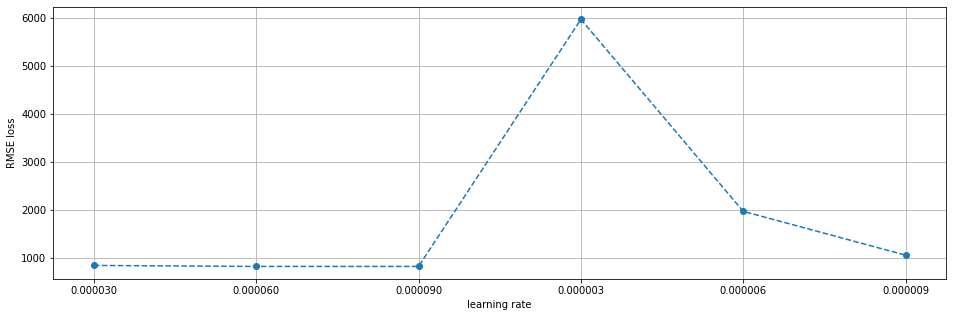

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(16, 5))

VERY_BIG_NUMBER = 1e10

to_plot = dict()
for key, value in rmse_history.items():
    if value < VERY_BIG_NUMBER:
        to_plot[f'{key:.6f}'] = value

plt.plot(to_plot.keys(), to_plot.values(), '--o')
plt.ylabel('RMSE loss')
plt.xlabel('learning rate')
plt.grid()
plt.show()

###### Видим, что адекватные значения получаются только при learning_rate порядка $10^{-5}$. Найдём самый оптимальный среди них:

In [ ]:
params = dict(learning_rate = [10 ** (-5) * i for i in range(1, 10)])
params

{'learning_rate': [1e-05,
  2e-05,
  3.0000000000000004e-05,
  4e-05,
  5e-05,
  6.000000000000001e-05,
  7.000000000000001e-05,
  8e-05,
  9e-05]}

In [ ]:
rmse_history = {}

warnings.filterwarnings("ignore")

for lr in params['learning_rate']:
    regressor = CustomSGDRegressor(learning_rate=lr, fit_intercept=True, max_iter=200, shuffle=True, batch_size=2048)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_val)
    rmse_history[lr] = mean_squared_error(y_pred, y_val) ** 0.5
    
warnings.resetwarnings()

In [ ]:
rmse_history

{1e-05: 975.1940119138898,
 2e-05: 860.471510434291,
 3.0000000000000004e-05: 838.994042082948,
 4e-05: 827.537881641697,
 5e-05: 820.9447743524858,
 6.000000000000001e-05: 819.1929643346389,
 7.000000000000001e-05: 814.9346559365646,
 8e-05: 814.6068211870884,
 9e-05: 814.7484757601975}

###### При learning_rate $= 8 \cdot 10^{-5}$ достигается минимум RMSE

Посмотрим, куда сойдётся наша модель

In [ ]:
regressor = CustomSGDRegressor(learning_rate=8e-5, fit_intercept=True, max_iter=200, shuffle=True, batch_size=2048)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

794.6514511176796

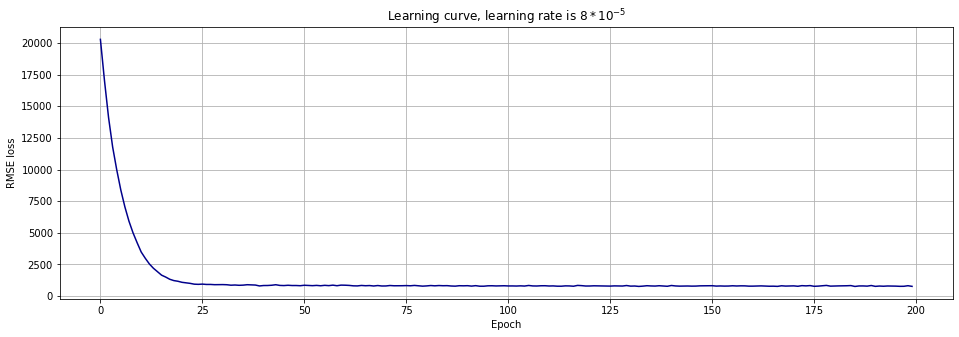

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.title('Learning curve, learning rate is $8 * 10^{-5}$')
plt.plot(regressor.loss_history, color='darkblue', label='Train')
plt.ylabel('RMSE loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

###### Как мы видим, моделька сходится достаточно быстро -- на 50-й эпохе уже можно утверждать, что мы вышли на плато

###### Здесь мы работали с отмасштабированными признаками (имхо, признаки надо масштабировать примерно всегда хотя бы для того, чтобы моделька сходилась быстрее). Посмотрим, что будет, если бы мы не масштабировали их:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

regressor = CustomSGDRegressor(learning_rate=8e-5, fit_intercept=True, max_iter=1000, shuffle=True, batch_size=2048)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

/home/vlad/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:427: RuntimeWarning: overflow encountered in square
  output_errors = n

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

###### Я достаточно долго старался, но номально запустить обучение на немасштабированных признаках у меня так и не удалось из-за того, что на первых итерациях значения улетают в бесконечность, а оттуда мы выбраться уже не в состоянии))0)

Короче говоря, вывод: признаки нужно масштабировать примерно всегда. Это сильно повлиляет на скорость сходимости, а иногда (как здесь) даже запустить обучение на изначальных признаках в принципе может быть проблематично

-----------------------------------------------------------------------------------------------------------------------------

Обучите [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) выставив его параметры при инициализации так, что бы он максимально был близок к реализованной вами модели.

Сравните вашу реализацию и реализацию из sklearn: 
    
    1. Достигают ли они сравнимого качества на данном наборе данных?
    2. Одинаковая ли у них скорость сходимости? 
    3. Одинаковая ли скорость обучения при заданном количестве эпох?
    4. Похожие ли веса модели были найдены?
    
Если ваша реализация сильно отличается по данным параметрам от реализации из sklearn, то проанализируйте почему.

###### Попробуем сначала обучиться на немасштабированных данных:

In [ ]:
from sklearn.linear_model import SGDRegressor

sklearn_sgd = SGDRegressor(learning_rate='constant', eta0=8e-5, penalty='None', fit_intercept=True,
                           shuffle=True, max_iter=1000, verbose=True)

sklearn_sgd.fit(x_train, y_train)
y_pred = sklearn_sgd.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

-- Epoch 1
Norm: 11402084348105.19, NNZs: 95, Bias: -435394529.913359, T: 34963, Avg. loss: 360640199470544055805229127434240.000000
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 13697173091275.69, NNZs: 95, Bias: -329546721.846981, T: 69926, Avg. loss: 362505055509766111292102027509760.000000
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 12103675373535.12, NNZs: 95, Bias: -240052295.608530, T: 104889, Avg. loss: 362680649964527757433340434579456.000000
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 11767062004620.76, NNZs: 95, Bias: 435105360.705197, T: 139852, Avg. loss: 363158893916444127225308860383232.000000
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 12372427413079.05, NNZs: 95, Bias: 1699238668.751636, T: 174815, Avg. loss: 362935944116135841172189561749504.000000
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 12561153382586.24, NNZs: 95, Bias: 1537383758.948627, T: 209778, Avg. loss: 361673527918679651272975643049984.000000
Total training time: 0.1

1.621129260579501e+16

###### Модель расходится -- так что нет ничего удивительного в том, что наша самописная также не вывезла)

Нормализуем же теперь признаки:

In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import SGDRegressor

sklearn_sgd = SGDRegressor(learning_rate='constant', eta0=8e-5, penalty='None', fit_intercept=True,
                           shuffle=True, max_iter=1000, verbose=True)

sklearn_sgd.fit(x_train, y_train)
y_pred = sklearn_sgd.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

-- Epoch 1
Norm: 1527.61, NNZs: 95, Bias: 18856.492023, T: 34963, Avg. loss: 36729680.898419
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1782.30, NNZs: 95, Bias: 20000.856856, T: 69926, Avg. loss: 539442.895208
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1941.71, NNZs: 95, Bias: 20071.464395, T: 104889, Avg. loss: 366060.091194
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 2057.30, NNZs: 95, Bias: 20075.374843, T: 139852, Avg. loss: 347145.290466
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 2159.18, NNZs: 95, Bias: 20075.567600, T: 174815, Avg. loss: 336578.168312
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 2228.89, NNZs: 95, Bias: 20075.831511, T: 209778, Avg. loss: 329890.497034
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 2285.60, NNZs: 95, Bias: 20076.794660, T: 244741, Avg. loss: 325885.697061
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 2332.51, NNZs: 95, Bias: 20078.257988, T: 279704, Avg. loss: 322837.786765
Total training time

804.5558349995373

###### Ответы на вопроски:
1. Да, реализации имеют одинаковое качество на тестовых данных
2. Да, одинаковая: модель из sklearn делает early_stopping на 39 эпохе. Наша модель к 39 эпохе тоже сходится, что можно видеть на графике

Посчитаем теперь время обучения моделей:

In [ ]:
import time

sklearn_sgd = SGDRegressor(learning_rate='constant', eta0=8e-5, penalty='None', fit_intercept=True,
                           shuffle=True, max_iter=200, verbose=True, early_stopping=False, tol=None)

t_start = time.time()
sklearn_sgd.fit(x_train, y_train)
t_end = time.time()

-- Epoch 1
Norm: 1508.21, NNZs: 95, Bias: 18855.076401, T: 34963, Avg. loss: 36741277.337556
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1788.03, NNZs: 95, Bias: 20004.924503, T: 69926, Avg. loss: 537870.466851
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1952.99, NNZs: 95, Bias: 20080.197567, T: 104889, Avg. loss: 363791.724539
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 2073.82, NNZs: 95, Bias: 20078.864059, T: 139852, Avg. loss: 345004.293789
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 2163.43, NNZs: 95, Bias: 20078.661336, T: 174815, Avg. loss: 335162.337917
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 2238.86, NNZs: 95, Bias: 20073.358289, T: 209778, Avg. loss: 329105.212297
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 2297.59, NNZs: 95, Bias: 20078.614472, T: 244741, Avg. loss: 324909.748209
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 2345.65, NNZs: 95, Bias: 20075.844996, T: 279704, Avg. loss: 321965.108217
Total training time

Norm: 2690.23, NNZs: 95, Bias: 20077.751942, T: 2482373, Avg. loss: 312899.556626
Total training time: 1.22 seconds.
-- Epoch 72
Norm: 2693.71, NNZs: 95, Bias: 20071.791871, T: 2517336, Avg. loss: 313079.954360
Total training time: 1.23 seconds.
-- Epoch 73
Norm: 2696.44, NNZs: 95, Bias: 20079.032522, T: 2552299, Avg. loss: 313028.449306
Total training time: 1.25 seconds.
-- Epoch 74
Norm: 2696.33, NNZs: 95, Bias: 20078.957458, T: 2587262, Avg. loss: 313152.010015
Total training time: 1.26 seconds.
-- Epoch 75
Norm: 2695.19, NNZs: 95, Bias: 20078.104443, T: 2622225, Avg. loss: 313005.605469
Total training time: 1.28 seconds.
-- Epoch 76
Norm: 2695.10, NNZs: 95, Bias: 20075.809866, T: 2657188, Avg. loss: 312929.754758
Total training time: 1.29 seconds.
-- Epoch 77
Norm: 2695.66, NNZs: 95, Bias: 20072.991224, T: 2692151, Avg. loss: 312931.748926
Total training time: 1.31 seconds.
-- Epoch 78
Norm: 2694.92, NNZs: 95, Bias: 20076.189151, T: 2727114, Avg. loss: 313092.327138
Total training 

Norm: 2692.87, NNZs: 95, Bias: 20072.210407, T: 4720005, Avg. loss: 313049.599813
Total training time: 2.33 seconds.
-- Epoch 136
Norm: 2693.79, NNZs: 95, Bias: 20075.330318, T: 4754968, Avg. loss: 312896.076102
Total training time: 2.34 seconds.
-- Epoch 137
Norm: 2694.11, NNZs: 95, Bias: 20078.608275, T: 4789931, Avg. loss: 313026.171598
Total training time: 2.36 seconds.
-- Epoch 138
Norm: 2697.22, NNZs: 95, Bias: 20082.994715, T: 4824894, Avg. loss: 313109.549854
Total training time: 2.38 seconds.
-- Epoch 139
Norm: 2695.05, NNZs: 95, Bias: 20085.152107, T: 4859857, Avg. loss: 312992.092780
Total training time: 2.40 seconds.
-- Epoch 140
Norm: 2695.80, NNZs: 95, Bias: 20078.674313, T: 4894820, Avg. loss: 313103.103140
Total training time: 2.44 seconds.
-- Epoch 141
Norm: 2692.24, NNZs: 95, Bias: 20074.969141, T: 4929783, Avg. loss: 313256.497110
Total training time: 2.45 seconds.
-- Epoch 142
Norm: 2693.51, NNZs: 95, Bias: 20077.444170, T: 4964746, Avg. loss: 313077.117839
Total tr

In [ ]:
print(f'For sklearn model training time is {t_end - t_start} for {sklearn_sgd.max_iter} epochs')

For sklearn model training time is 3.7201855182647705 for 200 epochs


In [ ]:
y_pred = sklearn_sgd.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

806.9027841792893

------------------------------------------------------------------------------------------------------------------------------

In [ ]:
regressor = CustomSGDRegressor(learning_rate=8e-5, fit_intercept=True, max_iter=200, shuffle=True, batch_size=2048)

t_start = time.time()
regressor.fit(x_train, y_train)
t_end = time.time()

print(f'For our model training time is {t_end - t_start} for {regressor.max_iter} epochs')

For our model training time is 0.6365442276000977 for 200 epochs


In [ ]:
y_pred = regressor.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

810.9311647537671

###### 3. Модель из sklearn прогоняет 200 эпох за почти 3с, наша же справляется менее, чем за 0.7с. Такая "эффективность" объясняется тем, что в моей имплементации мы на каждой эпохе прогоняемся не по всем объектам обучающей выборки, а только по количеству, равному batch_size

Сравним теперь веса наших моделей:

In [ ]:
float(sklearn_sgd.intercept_), regressor.intercept_

(20079.170932211775, 20069.839618697544)

In [ ]:
sklearn_sgd.coef_, regressor.coef_

(array([-4.49148245e+00, -7.50774548e+00,  1.56500344e+01, -2.32632786e+01,
         1.24919800e+01, -1.84003824e+01,  5.73176791e+01,  1.32427818e+02,
         1.19664661e+03, -4.45825529e+00, -2.24230053e+01,  3.64814792e+00,
         1.57168427e+00,  2.70414446e+01, -2.92347863e+01,  3.62726238e+01,
         1.55342325e+02,  1.16805321e+03, -5.59131506e+00,  2.44997680e+01,
        -2.72928018e+01,  2.55291768e+01, -2.79234474e+01, -2.68149054e+01,
         3.88418473e+01,  1.24759932e+02,  1.22411241e+03, -9.07196799e+00,
        -2.45053399e+01, -2.75704991e+01,  3.83584147e+01, -1.77272569e+01,
         1.73632235e+01,  1.57522924e+01,  1.32169429e+02,  1.20567175e+03,
        -3.21525820e+00, -1.31469747e+00, -3.46710106e+00,  6.34520910e+00,
         1.92607184e+01, -1.82482867e+01,  2.41066840e+01,  1.64588413e+02,
         1.16155519e+03,  1.77867696e+00, -1.60470064e+01,  1.85366687e+01,
         2.59524030e+00, -1.41895950e+01, -5.35310774e+00, -7.02944084e+00,
         3.9

In [ ]:
# посмотрим, есть ли значения весов, отличающиеся на порядок

for sk, our in zip(sklearn_sgd.coef_, regressor.coef_):
    if not 0.1 <= abs(sk / our) <= 10:
        print(f'{sk:.{3}}, {our:.{3}}')

-4.46, -0.384
27.0, -1.4
-16.7, -1.17
0.0886, -5.59
-10.2, 0.848


###### 4. Видим, что есть веса, отличающиеся на порядок, но их всего 5 из 96, так что в целом мы можем сказать, что веса моделей довольно близки, обе модели сходятся в один и тот же минимум

-----------------------------------------------------------------------------------------------------------------------------

**Задание 2** (2 балла)

Повысьте качество модели `SGDRegressor` проведя эксперименты со стратегией обучения, а также с регуляризацией. 

Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Какая комбинация стратегии обучения и регуляризации оказалась выигрышной?

In [ ]:
from pprint import pprint

sgd = SGDRegressor(eta0=8e-5, fit_intercept=True, max_iter=300, shuffle=True)

params = dict(eta0 = [10 ** (-i) for i in range(2, 8)],
          penalty = ['l1', 'l2', None],
          alpha = [10 ** (-i) for i in range(1, 10)],
          learning_rate = ['invscaling', 'optimal', 'constant'])

pprint(params)

{'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09],
 'eta0': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07],
 'learning_rate': ['invscaling', 'optimal', 'constant'],
 'penalty': ['l1', 'l2', None]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

warnings.filterwarnings("ignore")

kf = KFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(estimator=sgd, param_grid=params, scoring='neg_mean_squared_error', cv=kf, verbose=3)
grid_score = grid_cv.fit(x_train, y_train)

warnings.resetwarnings()

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-612316.378 total time=   0.8s
[CV 2/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-645243.510 total time=   0.6s
[CV 3/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-644907.007 total time=   0.8s
[CV 4/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-642200.693 total time=   0.9s
[CV 5/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-627298.552 total time=   0.7s
[CV 1/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-743701.469 total time=   0.4s
[CV 2/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-778387.591 total time=   0.6s
[CV 3/5] END alpha=0.1, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-789043.028 total time=   0.6s
[CV 4/5] END alpha=0.1, eta0=0.01, learning_rate

[CV 2/5] END alpha=0.1, eta0=0.001, learning_rate=optimal, penalty=None;, score=-1902450399598895169536.000 total time=   3.5s
[CV 3/5] END alpha=0.1, eta0=0.001, learning_rate=optimal, penalty=None;, score=-1686721337273851838464.000 total time=   3.5s
[CV 4/5] END alpha=0.1, eta0=0.001, learning_rate=optimal, penalty=None;, score=-1822539767013904482304.000 total time=   3.3s
[CV 5/5] END alpha=0.1, eta0=0.001, learning_rate=optimal, penalty=None;, score=-1531062849940878524416.000 total time=   3.4s
[CV 1/5] END alpha=0.1, eta0=0.001, learning_rate=constant, penalty=l1;, score=-642321.254 total time=   0.6s
[CV 2/5] END alpha=0.1, eta0=0.001, learning_rate=constant, penalty=l1;, score=-674086.377 total time=   0.8s
[CV 3/5] END alpha=0.1, eta0=0.001, learning_rate=constant, penalty=l1;, score=-677230.753 total time=   0.6s
[CV 4/5] END alpha=0.1, eta0=0.001, learning_rate=constant, penalty=l1;, score=-654543.818 total time=   0.4s
[CV 5/5] END alpha=0.1, eta0=0.001, learning_rate=co

[CV 4/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=l2;, score=-7468203.597 total time=   4.2s
[CV 5/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=l2;, score=-7306525.471 total time=   4.4s
[CV 1/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7190725.324 total time=   3.7s
[CV 2/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7294364.953 total time=   3.8s
[CV 3/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7313876.469 total time=   3.9s
[CV 4/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7421325.151 total time=   3.8s
[CV 5/5] END alpha=0.1, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7269384.588 total time=   3.8s
[CV 1/5] END alpha=0.1, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-1982850494929433001984.000 total time=   6.3s
[CV 2/5] END alpha=0.1, eta0=1e-05, learning_rate=optimal, penalty=l1;, sc

[CV 5/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l1;, score=-693360.245 total time=   6.2s
[CV 1/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-765722.063 total time=   3.6s
[CV 2/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-806265.842 total time=   3.6s
[CV 3/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-797059.371 total time=   3.7s
[CV 4/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-794423.118 total time=   3.6s
[CV 5/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-777852.070 total time=   3.7s
[CV 1/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=None;, score=-687661.922 total time=   3.7s
[CV 2/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=None;, score=-727551.824 total time=   3.6s
[CV 3/5] END alpha=0.1, eta0=1e-06, learning_rate=constant, penalty=None;, score=-714744.042 total time=   3.5s
[CV 

[CV 2/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l1;, score=-311956579023422.188 total time=   6.4s
[CV 3/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l1;, score=-52595530231632.008 total time=   6.3s
[CV 4/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l1;, score=-53361382544955.078 total time=   6.5s
[CV 5/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l1;, score=-52238558670380.703 total time=   6.6s
[CV 1/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-779726.461 total time=   3.5s
[CV 2/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-1112589.101 total time=   3.6s
[CV 3/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-709578.218 total time=   3.6s
[CV 4/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-794137.694 total time=   3.6s
[CV 5/5] END alpha=0.01, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-748220.352 tota

[CV 5/5] END alpha=0.01, eta0=0.001, learning_rate=constant, penalty=None;, score=-652855.409 total time=   0.2s
[CV 1/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-628150.781 total time=   7.0s
[CV 2/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-662352.815 total time=   6.4s
[CV 3/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-657273.869 total time=   6.6s
[CV 4/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-647965.191 total time=   6.5s
[CV 5/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-632120.305 total time=   6.6s
[CV 1/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-634773.937 total time=   3.7s
[CV 2/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-669927.598 total time=   3.9s
[CV 3/5] END alpha=0.01, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-66410

[CV 2/5] END alpha=0.01, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-77398420080006.625 total time=   3.5s
[CV 3/5] END alpha=0.01, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-59327323813228.016 total time=   3.9s
[CV 4/5] END alpha=0.01, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-179236270650753.094 total time=   3.9s
[CV 5/5] END alpha=0.01, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-57966789479514.789 total time=   3.6s
[CV 1/5] END alpha=0.01, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-608263.415 total time=   4.7s
[CV 2/5] END alpha=0.01, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-643433.954 total time=   5.0s
[CV 3/5] END alpha=0.01, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-640406.839 total time=   5.5s
[CV 4/5] END alpha=0.01, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-631361.732 total time=   5.3s
[CV 5/5] END alpha=0.01, eta0=1e-05, learning_rate=constant, penalty=l1;, s

[CV 4/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393665948.823 total time=   3.9s
[CV 5/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391534342.583 total time=   3.9s
[CV 1/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-392404075.941 total time=   4.1s
[CV 2/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391949156.265 total time=   4.1s
[CV 3/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393528467.766 total time=   4.4s
[CV 4/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393665499.681 total time=   4.0s
[CV 5/5] END alpha=0.01, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391534582.835 total time=   3.9s
[CV 1/5] END alpha=0.01, eta0=1e-07, learning_rate=optimal, penalty=l1;, score=-87643636473893.750 total time=   6.2s
[CV 2/5] END alpha=0.01, eta0=1e-07, learning_rate=optimal, 

[CV 2/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1643268.062 total time=   0.3s
[CV 3/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1281269.905 total time=   0.3s
[CV 4/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1736837.605 total time=   0.2s
[CV 5/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1672720.895 total time=   0.2s
[CV 1/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=None;, score=-1256885.814 total time=   0.2s
[CV 2/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=None;, score=-1200895.372 total time=   0.2s
[CV 3/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=None;, score=-1190790.954 total time=   0.2s
[CV 4/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=None;, score=-910240.464 total time=   0.2s
[CV 5/5] END alpha=0.001, eta0=0.01, learning_rate=constant, penalty=None;, score=-1153195.723 to

[CV 5/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l1;, score=-623779.500 total time=   1.9s
[CV 1/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l2;, score=-617975.423 total time=   0.9s
[CV 2/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l2;, score=-650246.318 total time=   0.9s
[CV 3/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l2;, score=-652770.086 total time=   0.8s
[CV 4/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l2;, score=-640782.593 total time=   1.0s
[CV 5/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=l2;, score=-629416.108 total time=   0.8s
[CV 1/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=None;, score=-621159.638 total time=   0.9s
[CV 2/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=None;, score=-645868.998 total time=   1.1s
[CV 3/5] END alpha=0.001, eta0=0.0001, learning_rate=optimal, penalty=None;, score=-652584.342 total

[CV 3/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l1;, score=-269127470.254 total time=   6.3s
[CV 4/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l1;, score=-269502446.203 total time=   5.9s
[CV 5/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l1;, score=-268033011.812 total time=   5.8s
[CV 1/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l2;, score=-268082010.477 total time=   3.6s
[CV 2/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l2;, score=-268270379.467 total time=   3.5s
[CV 3/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l2;, score=-269128481.950 total time=   3.6s
[CV 4/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l2;, score=-269502698.464 total time=   3.4s
[CV 5/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, penalty=l2;, score=-268034604.774 total time=   3.4s
[CV 1/5] END alpha=0.001, eta0=1e-06, learning_rate=invscaling, 

[CV 5/5] END alpha=0.001, eta0=1e-07, learning_rate=optimal, penalty=None;, score=-629600.869 total time=   1.2s
[CV 1/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l1;, score=-76301247.560 total time=   6.0s
[CV 2/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l1;, score=-76592364.348 total time=   6.1s
[CV 3/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l1;, score=-76795657.351 total time=   5.7s
[CV 4/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l1;, score=-77149470.702 total time=   5.7s
[CV 5/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l1;, score=-76548815.992 total time=   6.2s
[CV 1/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l2;, score=-76301467.121 total time=   3.3s
[CV 2/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l2;, score=-76592462.471 total time=   3.3s
[CV 3/5] END alpha=0.001, eta0=1e-07, learning_rate=constant, penalty=l2;, score=-7679598

[CV 2/5] END alpha=0.0001, eta0=0.001, learning_rate=invscaling, penalty=None;, score=-643715.654 total time=   1.1s
[CV 3/5] END alpha=0.0001, eta0=0.001, learning_rate=invscaling, penalty=None;, score=-640794.210 total time=   1.0s
[CV 4/5] END alpha=0.0001, eta0=0.001, learning_rate=invscaling, penalty=None;, score=-631343.115 total time=   1.2s
[CV 5/5] END alpha=0.0001, eta0=0.001, learning_rate=invscaling, penalty=None;, score=-616118.747 total time=   1.0s
[CV 1/5] END alpha=0.0001, eta0=0.001, learning_rate=optimal, penalty=l1;, score=-693161.593 total time=   3.3s
[CV 2/5] END alpha=0.0001, eta0=0.001, learning_rate=optimal, penalty=l1;, score=-667397.344 total time=   4.7s
[CV 3/5] END alpha=0.0001, eta0=0.001, learning_rate=optimal, penalty=l1;, score=-713682.728 total time=   3.1s
[CV 4/5] END alpha=0.0001, eta0=0.001, learning_rate=optimal, penalty=l1;, score=-757921.525 total time=   3.0s
[CV 5/5] END alpha=0.0001, eta0=0.001, learning_rate=optimal, penalty=l1;, score=-67

[CV 4/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=l2;, score=-633943.243 total time=   0.5s
[CV 5/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=l2;, score=-616980.710 total time=   0.5s
[CV 1/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=None;, score=-609562.656 total time=   0.5s
[CV 2/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=None;, score=-644597.692 total time=   0.6s
[CV 3/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=None;, score=-643452.012 total time=   0.4s
[CV 4/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=None;, score=-632175.899 total time=   0.5s
[CV 5/5] END alpha=0.0001, eta0=0.0001, learning_rate=constant, penalty=None;, score=-617707.748 total time=   0.5s
[CV 1/5] END alpha=0.0001, eta0=1e-05, learning_rate=invscaling, penalty=l1;, score=-7190654.253 total time=   6.1s
[CV 2/5] END alpha=0.0001, eta0=1e-05, learning_rate=invscaling, penalty=l1;

[CV 1/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=l2;, score=-687706.484 total time=   1.8s
[CV 2/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=l2;, score=-758660.056 total time=   1.8s
[CV 3/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=l2;, score=-682563.434 total time=   1.6s
[CV 4/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=l2;, score=-720478.540 total time=   1.6s
[CV 5/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=l2;, score=-712158.853 total time=   1.6s
[CV 1/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=None;, score=-699505.202 total time=   1.8s
[CV 2/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=None;, score=-738310.847 total time=   1.7s
[CV 3/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=None;, score=-717562.909 total time=   1.8s
[CV 4/5] END alpha=0.0001, eta0=1e-06, learning_rate=optimal, penalty=None;, score=-716208.419 tot

[CV 3/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-650594.381 total time=   0.6s
[CV 4/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-638789.947 total time=   0.5s
[CV 5/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l1;, score=-630386.489 total time=   0.7s
[CV 1/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-629362.344 total time=   0.4s
[CV 2/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-655203.630 total time=   0.4s
[CV 3/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-650457.339 total time=   0.4s
[CV 4/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-637180.438 total time=   0.5s
[CV 5/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=l2;, score=-626317.820 total time=   0.5s
[CV 1/5] END alpha=1e-05, eta0=0.01, learning_rate=invscaling, penalty=None;, score=-609995.440 

[CV 1/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l1;, score=-629747.060 total time=   0.6s
[CV 2/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l1;, score=-672008.549 total time=   0.4s
[CV 3/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l1;, score=-664121.560 total time=   0.3s
[CV 4/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l1;, score=-653924.230 total time=   0.4s
[CV 5/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l1;, score=-636229.849 total time=   0.4s
[CV 1/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l2;, score=-647732.422 total time=   0.2s
[CV 2/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l2;, score=-671150.664 total time=   0.3s
[CV 3/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l2;, score=-671286.258 total time=   0.3s
[CV 4/5] END alpha=1e-05, eta0=0.001, learning_rate=constant, penalty=l2;, score=-680181.993 total time=

[CV 3/5] END alpha=1e-05, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7314050.430 total time=   3.7s
[CV 4/5] END alpha=1e-05, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7421430.861 total time=   3.4s
[CV 5/5] END alpha=1e-05, eta0=1e-05, learning_rate=invscaling, penalty=None;, score=-7269092.608 total time=   3.4s
[CV 1/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-3587673.295 total time=   6.5s
[CV 2/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-2840619.161 total time=   8.0s
[CV 3/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-3279526.558 total time=   5.9s
[CV 4/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-1440796.948 total time=   7.1s
[CV 5/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l1;, score=-4290354.826 total time=   5.8s
[CV 1/5] END alpha=1e-05, eta0=1e-05, learning_rate=optimal, penalty=l2;, score=-1897153.

[CV 5/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=l2;, score=-693398.355 total time=   3.3s
[CV 1/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=None;, score=-687674.324 total time=   3.4s
[CV 2/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=None;, score=-727555.327 total time=   3.4s
[CV 3/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=None;, score=-714746.374 total time=   3.2s
[CV 4/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=None;, score=-710660.167 total time=   3.3s
[CV 5/5] END alpha=1e-05, eta0=1e-06, learning_rate=constant, penalty=None;, score=-693408.748 total time=   3.2s
[CV 1/5] END alpha=1e-05, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-392403638.269 total time=   6.1s
[CV 2/5] END alpha=1e-05, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-391949362.462 total time=   6.3s
[CV 3/5] END alpha=1e-05, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-

[CV 1/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-15509561966233435057946624.000 total time=   3.4s
[CV 2/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-39934340875016607463636992.000 total time=   3.4s
[CV 3/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-32441357805550575275737088.000 total time=   3.6s
[CV 4/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-31713665777571838457544704.000 total time=   3.4s
[CV 5/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=l2;, score=-41313573786448929058979840.000 total time=   3.3s
[CV 1/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=None;, score=-40158535274654133229977600.000 total time=   3.3s
[CV 2/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=None;, score=-38757539749160508339519488.000 total time=   3.5s
[CV 3/5] END alpha=1e-06, eta0=0.01, learning_rate=optimal, penalty=None;, score=-4183

[CV 1/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-628130.118 total time=   6.0s
[CV 2/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-662269.703 total time=   6.0s
[CV 3/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-657070.403 total time=   6.0s
[CV 4/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-648002.560 total time=   6.3s
[CV 5/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-632107.742 total time=   6.3s
[CV 1/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-628288.342 total time=   3.6s
[CV 2/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-662221.897 total time=   3.5s
[CV 3/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-657009.552 total time=   3.6s
[CV 4/5] END alpha=1e-06, eta0=0.0001, learning_rate=invscaling, penalty=l2;, sc

[CV 4/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=l2;, score=-51321192800715079021494272.000 total time=   3.6s
[CV 5/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=l2;, score=-30507774096416037784256512.000 total time=   3.4s
[CV 1/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-62688001133904672340312064.000 total time=   3.4s
[CV 2/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-41149655019407013117427712.000 total time=   3.3s
[CV 3/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-66732105259026833070882816.000 total time=   3.3s
[CV 4/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-18533354486726372951588864.000 total time=   3.3s
[CV 5/5] END alpha=1e-06, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-30806371512776556181192704.000 total time=   3.4s
[CV 1/5] END alpha=1e-06, eta0=1e-05, learning_rate=constant, penalty=l1;

[CV 3/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-393528497.432 total time=   5.9s
[CV 4/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-393666167.625 total time=   6.6s
[CV 5/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l1;, score=-391533926.619 total time=   5.8s
[CV 1/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-392403199.763 total time=   3.4s
[CV 2/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391948731.254 total time=   3.4s
[CV 3/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393528731.262 total time=   3.5s
[CV 4/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393665943.412 total time=   3.7s
[CV 5/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391534166.100 total time=   3.7s
[CV 1/5] END alpha=1e-06, eta0=1e-07, learning_rate=invscaling, 

[CV 1/5] END alpha=1e-07, eta0=0.01, learning_rate=optimal, penalty=None;, score=-6923684031649237834907254784.000 total time=   3.3s
[CV 2/5] END alpha=1e-07, eta0=0.01, learning_rate=optimal, penalty=None;, score=-7999319137805069360482484224.000 total time=   3.4s
[CV 3/5] END alpha=1e-07, eta0=0.01, learning_rate=optimal, penalty=None;, score=-5785283595105250585727729664.000 total time=   3.4s
[CV 4/5] END alpha=1e-07, eta0=0.01, learning_rate=optimal, penalty=None;, score=-5495107022872137230469562368.000 total time=   3.4s
[CV 5/5] END alpha=1e-07, eta0=0.01, learning_rate=optimal, penalty=None;, score=-6530885214833753494153854976.000 total time=   3.5s
[CV 1/5] END alpha=1e-07, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1719833.632 total time=   0.5s
[CV 2/5] END alpha=1e-07, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1049323.009 total time=   0.4s
[CV 3/5] END alpha=1e-07, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1348267.078 total time=  

[CV 5/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l1;, score=-632095.502 total time=   6.7s
[CV 1/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-628292.819 total time=   3.6s
[CV 2/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-662339.529 total time=   3.5s
[CV 3/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-657193.539 total time=   3.5s
[CV 4/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-647914.615 total time=   3.4s
[CV 5/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-632196.996 total time=   3.4s
[CV 1/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-628084.677 total time=   3.4s
[CV 2/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-662291.531 total time=   3.4s
[CV 3/5] END alpha=1e-07, eta0=0.0001, learning_rate=invscaling, penalty=Non

[CV 2/5] END alpha=1e-07, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-4655199239736762418461671424.000 total time=   3.4s
[CV 3/5] END alpha=1e-07, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-4598742486301847154398855168.000 total time=   3.3s
[CV 4/5] END alpha=1e-07, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-5760584149289617295008595968.000 total time=   3.3s
[CV 5/5] END alpha=1e-07, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-4370924447571929359353643008.000 total time=   3.6s
[CV 1/5] END alpha=1e-07, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-608448.593 total time=   4.1s
[CV 2/5] END alpha=1e-07, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-643158.575 total time=   5.2s
[CV 3/5] END alpha=1e-07, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-640623.790 total time=   5.6s
[CV 4/5] END alpha=1e-07, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-632133.073 total time=   4.8s
[CV 5/5] END

[CV 1/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-392403784.138 total time=   3.4s
[CV 2/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391949907.317 total time=   3.4s
[CV 3/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393528342.073 total time=   3.5s
[CV 4/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393665965.620 total time=   3.5s
[CV 5/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391533384.754 total time=   3.9s
[CV 1/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-392404180.417 total time=   3.8s
[CV 2/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391949303.937 total time=   3.5s
[CV 3/5] END alpha=1e-07, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393528654.652 total time=   3.4s
[CV 4/5] END alpha=1e-07, eta0=1e-07, learning_rate=invsca

[CV 3/5] END alpha=1e-08, eta0=0.01, learning_rate=optimal, penalty=None;, score=-889123107399869426295728242688.000 total time=   3.4s
[CV 4/5] END alpha=1e-08, eta0=0.01, learning_rate=optimal, penalty=None;, score=-320483967685740501721340182528.000 total time=   3.7s
[CV 5/5] END alpha=1e-08, eta0=0.01, learning_rate=optimal, penalty=None;, score=-487971320935292946535166246912.000 total time=   3.4s
[CV 1/5] END alpha=1e-08, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1404997.963 total time=   0.3s
[CV 2/5] END alpha=1e-08, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1536628.976 total time=   0.4s
[CV 3/5] END alpha=1e-08, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1169423.987 total time=   0.3s
[CV 4/5] END alpha=1e-08, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1140237.669 total time=   0.3s
[CV 5/5] END alpha=1e-08, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1171008.099 total time=   0.3s
[CV 1/5] END alpha=1e-08, eta0=0

[CV 2/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-662282.193 total time=   3.6s
[CV 3/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-657112.141 total time=   3.6s
[CV 4/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-647973.603 total time=   3.6s
[CV 5/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-632145.860 total time=   3.6s
[CV 1/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-628156.289 total time=   3.4s
[CV 2/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-662373.359 total time=   3.4s
[CV 3/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-657196.757 total time=   3.4s
[CV 4/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-647991.992 total time=   3.9s
[CV 5/5] END alpha=1e-08, eta0=0.0001, learning_rate=invscaling, penalty

[CV 4/5] END alpha=1e-08, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-207173502337244827879196327936.000 total time=   3.3s
[CV 5/5] END alpha=1e-08, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-668341052353878675405095829504.000 total time=   3.3s
[CV 1/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-607894.399 total time=   4.5s
[CV 2/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-643003.791 total time=   4.9s
[CV 3/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-640283.705 total time=   4.8s
[CV 4/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-632021.840 total time=   4.3s
[CV 5/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-615893.441 total time=   4.7s
[CV 1/5] END alpha=1e-08, eta0=1e-05, learning_rate=constant, penalty=l2;, score=-607524.606 total time=   2.7s
[CV 2/5] END alpha=1e-08, eta0=1e-05, learning_rate=co

[CV 3/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393528911.752 total time=   3.4s
[CV 4/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393666107.679 total time=   3.4s
[CV 5/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391534074.136 total time=   3.7s
[CV 1/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-392403694.771 total time=   3.8s
[CV 2/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391949234.052 total time=   3.6s
[CV 3/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393528473.854 total time=   3.4s
[CV 4/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393665884.990 total time=   3.5s
[CV 5/5] END alpha=1e-08, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391534616.062 total time=   3.4s
[CV 1/5] END alpha=1e-08, eta0=1e-07, learning_rate=op

[CV 5/5] END alpha=1e-09, eta0=0.01, learning_rate=optimal, penalty=None;, score=-20944825601220102500202634543104.000 total time=   3.3s
[CV 1/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1473142.290 total time=   0.3s
[CV 2/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1193529.115 total time=   0.3s
[CV 3/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1871338.918 total time=   0.4s
[CV 4/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l1;, score=-1164744.754 total time=   0.4s
[CV 5/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l1;, score=-937010.028 total time=   0.4s
[CV 1/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1488124.028 total time=   0.2s
[CV 2/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l2;, score=-1473730.754 total time=   0.2s
[CV 3/5] END alpha=1e-09, eta0=0.01, learning_rate=constant, penalty=l2;, score

[CV 4/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-648015.850 total time=   4.0s
[CV 5/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=l2;, score=-632269.840 total time=   4.0s
[CV 1/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-628183.323 total time=   4.0s
[CV 2/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-662294.976 total time=   4.2s
[CV 3/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-657364.647 total time=   4.2s
[CV 4/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-648048.256 total time=   4.3s
[CV 5/5] END alpha=1e-09, eta0=0.0001, learning_rate=invscaling, penalty=None;, score=-632220.293 total time=   4.1s
[CV 1/5] END alpha=1e-09, eta0=0.0001, learning_rate=optimal, penalty=l1;, score=-24653795054293324379430942932992.000 total time=   7.9s
[CV 2/5] END alpha=1e-09, eta0=0.0001, learning

[CV 5/5] END alpha=1e-09, eta0=1e-05, learning_rate=optimal, penalty=None;, score=-24747663006765072826593494171648.000 total time=   3.4s
[CV 1/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-607603.940 total time=   5.0s
[CV 2/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-643135.286 total time=   5.4s
[CV 3/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-640452.313 total time=   5.3s
[CV 4/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-631885.899 total time=   4.7s
[CV 5/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l1;, score=-615304.068 total time=   5.0s
[CV 1/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l2;, score=-607585.480 total time=   2.9s
[CV 2/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l2;, score=-643073.433 total time=   2.8s
[CV 3/5] END alpha=1e-09, eta0=1e-05, learning_rate=constant, penalty=l2;, sc

[CV 4/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-393666932.384 total time=   3.7s
[CV 5/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=l2;, score=-391534344.271 total time=   3.7s
[CV 1/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-392403266.573 total time=   3.4s
[CV 2/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391948642.294 total time=   3.4s
[CV 3/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393529045.854 total time=   3.4s
[CV 4/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-393665810.374 total time=   3.5s
[CV 5/5] END alpha=1e-09, eta0=1e-07, learning_rate=invscaling, penalty=None;, score=-391533675.684 total time=   3.5s
[CV 1/5] END alpha=1e-09, eta0=1e-07, learning_rate=optimal, penalty=l1;, score=-15760434689835849300248008589312.000 total time=   7.5s
[CV 2/5] END alpha=1e-09, eta0=1e-

In [ ]:
(-grid_score.best_score_ ) ** 0.5

792.1795189392149

In [ ]:
# переводим score в rmse
grid_score.cv_results_['mean_test_score'] = (-1 * grid_score.cv_results_['mean_test_score']) ** 0.5
grid_score.cv_results_['mean_test_score']

array([7.96488059e+02, 8.74851014e+02, 7.96413056e+02, 4.37408707e+10,
       3.27757779e+05, 4.47533560e+10, 8.77293361e+02, 1.18030380e+03,
       1.08688131e+03, 7.92247613e+02, 8.67392953e+02, 7.92656473e+02,
       4.15636073e+10, 3.24061360e+05, 4.22235203e+10, 8.10733512e+02,
       8.80222091e+02, 8.17952960e+02, 8.03445665e+02, 8.68748843e+02,
       8.03513792e+02, 4.55763651e+10, 3.52123725e+05, 5.16488978e+10,
       7.93499324e+02, 8.67921025e+02, 7.93508489e+02, 2.70143823e+03,
       2.70888753e+03, 2.70146910e+03, 4.38613991e+10, 3.27605282e+05,
       4.59703526e+10, 7.92179519e+02, 8.67090341e+02, 7.92228873e+02,
       1.63891530e+04, 1.63897173e+04, 1.63891415e+04, 4.43236250e+10,
       3.44178253e+05, 4.26407262e+10, 8.40693478e+02, 8.87842606e+02,
       8.40716237e+02, 1.98145480e+04, 1.98145750e+04, 1.98145489e+04,
       3.86878550e+10, 3.23633839e+05, 4.58308794e+10, 8.75655817e+03,
       8.75785505e+03, 8.75657094e+03, 7.98944607e+02, 8.00648392e+02,
      

In [ ]:
grid_score.best_params_

{'alpha': 0.1, 'eta0': 1e-05, 'learning_rate': 'constant', 'penalty': 'l1'}

In [ ]:
grid_score.cv_results_

{'mean_fit_time': array([0.75836887, 0.48647685, 0.48384309, 6.75556188, 4.37273717,
        3.39109383, 0.56091199, 0.18526583, 0.19389601, 1.90304751,
        0.51140771, 1.04461617, 5.96534982, 3.37837071, 3.41933351,
        0.59103599, 0.21471167, 0.20603518, 7.73421578, 3.75896597,
        3.56897645, 6.9439188 , 3.99856668, 3.97069569, 0.97622371,
        0.39290843, 0.52783351, 6.70503526, 3.97028689, 3.80228925,
        6.31631508, 3.76405921, 3.7009975 , 5.88258023, 1.55915542,
        3.19672699, 6.49431047, 3.83118997, 3.79690762, 6.4861764 ,
        3.67436357, 3.63357806, 6.38264766, 3.642202  , 3.65275364,
        6.47857757, 3.93990536, 3.77005525, 6.53968763, 3.81370077,
        3.71395383, 6.38263507, 3.63927436, 3.93202801, 0.90372987,
        0.52549419, 0.52917237, 6.4268333 , 3.57150407, 3.6752665 ,
        1.3261909 , 0.19503279, 0.23779154, 1.8164392 , 0.9759798 ,
        0.96690869, 6.38625932, 3.64875484, 3.78883033, 0.39839025,
        0.27222881, 0.25416861,

In [ ]:
num_of_each_param = (9, 6, 3, 3)
grid_score.cv_results_['mean_test_score'] = grid_score.cv_results_['mean_test_score'].reshape(num_of_each_param)

In [ ]:
a = grid_score.cv_results_['mean_test_score']
best_solution = list(np.unravel_index(a.argmin(), a.shape))

###### Видим, что выиграла комбинация с $l_1$ регуляризацией и с константным learning_rate = $10^{-5}$

In [ ]:
best_regressor = SGDRegressor(eta0=1e-5, learning_rate='constant', penalty='l1', alpha=0.1,
                              fit_intercept=True, max_iter=1000, shuffle=True)

best_regressor.fit(x_train, y_train)
y_pred = best_regressor.predict(x_test)
mean_squared_error(y_pred, y_test) ** 0.5

815.4665659226943

###### Построим графики зависимости score от каждого из гиперпараметров, фиксируя остальные гиперпараметрами теми, которые состоят в нашей "лучшей комбинации"

In [ ]:
params

{'eta0': [0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07],
 'penalty': ['l1', 'l2', None],
 'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09],
 'learning_rate': ['invscaling', 'optimal', 'constant']}

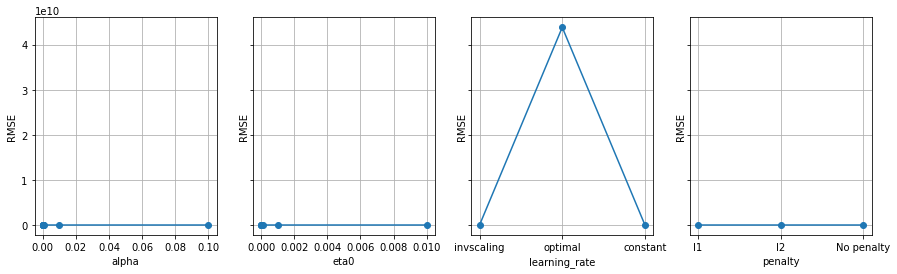

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

In [ ]:
from copy import deepcopy

param_ind = 0

fig, axes = plt.subplots(1, len(params), sharey=True, figsize=(15,4))

for param_name in ['alpha', 'eta0', 'learning_rate', 'penalty']:
    param_values = params[param_name]
    scores = []
    if param_name == 'penalty':
        param_values[2] = 'No penalty'
    for ind, value in enumerate(param_values):
        solution_ind = deepcopy(best_solution)
        solution_ind[param_ind] = ind
        scores.append(grid_score.cv_results_['mean_test_score'][solution_ind[0]][solution_ind[1]][solution_ind[2]][solution_ind[3]])
        
    params_plot = axes[param_ind]
    params_plot.plot(param_values, scores, marker='o')
    params_plot.grid(True)
    params_plot.set_xlabel(param_name)    
    params_plot.set_ylabel('RMSE')
    plt.figure(figsize=(16, 5))
        
    param_ind += 1

Как мы видим, 'optimal' в гиперпараметре learning rate творит страшные вещи и заставляет модель расходиться. Построим графики без learning rate:

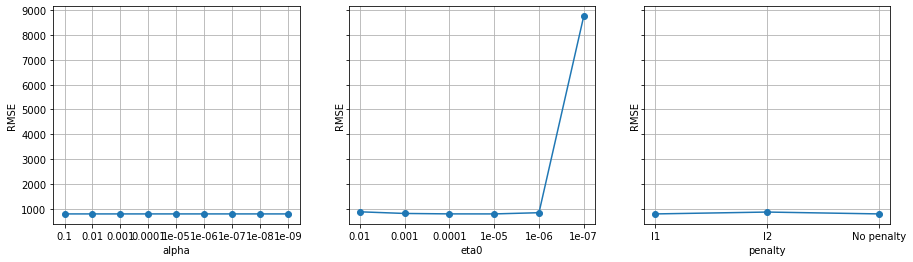

In [ ]:
from copy import deepcopy

param_ind = 0

fig, axes = plt.subplots(1, len(params)-1, sharey=True, figsize=(15,4))

for param_name in ['alpha', 'eta0', 'penalty']:
    if param_ind == 2:
        param_ind += 1
    param_values = params[param_name]
    scores = []
    if param_name == 'penalty':
        param_values[2] = 'No penalty'
    for ind, value in enumerate(param_values):
        solution_ind = deepcopy(best_solution)
        solution_ind[param_ind] = ind
        scores.append(grid_score.cv_results_['mean_test_score'][solution_ind[0]][solution_ind[1]][solution_ind[2]][solution_ind[3]])
        
    if param_ind == 3:
        param_ind -= 1
    params_plot = axes[param_ind]
    params_plot.plot(list(map(str, list(param_values))), scores, marker='o')
    params_plot.grid(True)
    params_plot.set_xlabel(param_name)    
    params_plot.set_ylabel('RMSE')
        
    param_ind += 1

**Задание 3** (3 балла)

Попробуйте обогатить `X` данными из остальных таблиц, так что бы повысить качество модели `SGDRegressor`.

Проведите ряд экспериментов, целью которых будет выявить оптимальный набор данных для решения данной задачи. 

Все эксперименты должны быть подкреплены корректными и понятными графиками.

Опишите вашу стратегию добавления признаков и оценки их значимости, а также ответьте на вопросы:

1. Удалось ли повысить качество предсказания за счёт добавления новых признаков?
2. Есть ли признаки, добавление которых, ухудшило качество модели? Как вы думаете, почему так произошло?

In [ ]:
cols_to_one_hot = [f'player_{i}' for i in range(0, 10)]
items_columns = [f'item_{i}' for i in range(0, 121)]
heroes_columns = [f'heroes_{i}' for i in range(0, 111)]

###### Чтобы предсказывать количество золота на 600 секунде -- берём значения deny на 540 секунде

In [ ]:
j1 = pd.read_csv('deny.csv')
j1 = j1[(j1['time'] == 540)].drop(['time'], axis=1)
j1['radiant_deny'] = j1[[f'player_{i}' for i in range(0, 5)]].sum(axis=1)
j1['dire_deny'] = j1[[f'player_{i}' for i in range(5, 10)]].sum(axis=1)
deny = j1.drop(cols_to_one_hot, axis=1)
deny

,mid,radiant_deny,dire_deny
8,0,-5,-5
18,1,-5,-5
28,2,-5,-5
38,3,-5,-5
48,4,-5,-5
...,...,...,...
814648,81464,15,72
814658,81465,41,23
814668,81466,24,36
814678,81467,9,12


###### Берём столбец events, обрезаем значения на 600 секунде. Все отальные ивенты суммируем для каждой игры, причём каждый ивент берём со знаком +, если были произведены командой radiant, иначе со знаком -

In [ ]:
j2 = pd.read_csv('events.csv')
j2 = j2[j2['time'] != 600]
j2 = j2.join(pd.get_dummies(j2['event_type'])).drop(['event_type', 'time'], axis=1)
j2 = j2.groupby(by=['mid', 'from_team'], as_index=False).sum()
j2.loc[j2['from_team'] == 'dire', [0, 1, 2, 3, 4, 5, 6]] = j2.loc[j2['from_team'] == 'dire', [0, 1, 2, 3, 4, 5, 6]].apply(lambda x: x * (-1)).values
j2 = j2.groupby(by='mid').sum()
events = j2.reset_index()
events

,mid,0,1,2,3,4,5,6
0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0
2,2,0,0,0,-1,0,0,0
3,3,0,0,0,1,0,0,0
4,4,0,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...
49050,49943,0,0,0,1,0,0,-1
49051,49944,0,0,0,-1,0,0,0
49052,49945,0,0,0,-1,0,0,-1
49053,49946,0,0,0,-1,0,0,-1


###### Пик героев -- очень важная фича. Делаем one-hot encoding, естественно, разбиваем по командам

In [ ]:
j4 = pd.read_csv('heroes.csv')
for ind in range(0, 111):
    j4[f'radiant_heroes_{ind}'] = j4[(j4[cols_to_one_hot[:5]] == ind)].count(axis=1)
    j4[f'dire_heroes_{ind}'] = j4[(j4[cols_to_one_hot[5:]] == ind)].count(axis=1)
heroes = j4.drop(cols_to_one_hot, axis=1)
heroes

,mid,radiant_heroes_0,dire_heroes_0,radiant_heroes_1,dire_heroes_1,radiant_heroes_2,dire_heroes_2,radiant_heroes_3,dire_heroes_3,radiant_heroes_4,...,radiant_heroes_106,dire_heroes_106,radiant_heroes_107,dire_heroes_107,radiant_heroes_108,dire_heroes_108,radiant_heroes_109,dire_heroes_109,radiant_heroes_110,dire_heroes_110
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,49943,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49944,49944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49945,49945,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49946,49946,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Items предобрабатываем так же, как и events: radiant суммируем с плюсом, dire -- с минусом

In [ ]:
j5 = pd.read_csv('items.csv')
j5.loc[(j5['player'] == 5) | (j5['player'] == 6) |
   (j5['player'] == 7) | (j5['player'] == 8) | (j5['player'] == 9), items_columns] = j5[items_columns] * (-1)
items = j5.drop('player', axis=1).groupby(by='mid').sum().reset_index()
items

,mid,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,...,item_111,item_112,item_113,item_114,item_115,item_116,item_117,item_118,item_119,item_120
0,0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,49943,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-3.0,3.0,0.0,0.0,0.0,0.0
49944,49944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
49945,49945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
49946,49946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


###### Выкидываем данные с 600-й секунды, в остальном просто суммируем количество убийств для каждой из команд

In [ ]:
j6 = pd.read_csv('kills.csv')
j6 = j6[j6['time'] != 600]
j6['radiant_killed'] = ((j6['killer'] == 'player_0') | (j6['killer'] == 'player_1') | (j6['killer'] == 'player_2') | 
                        (j6['killer'] == 'player_3') | (j6['killer'] == 'player_4')).astype(int)
j6['dire_killed'] = ((j6['killer'] == 'player_5') | (j6['killer'] == 'player_6') | (j6['killer'] == 'player_7') | 
                        (j6['killer'] == 'player_8') | (j6['killer'] == 'player_9')).astype(int)
j6 = j6.groupby(by='mid').sum().reset_index()
kills = j6.drop(['time', 'victim_id'], axis=1)
kills

,mid,radiant_killed,dire_killed
0,8004,7,1
1,12048,3,5
2,12920,5,1
3,15026,2,11
4,16204,6,10
...,...,...,...
55997,81464,4,8
55998,81465,7,0
55999,81466,6,14
56000,81467,13,5


###### Для данных lh и xp мы просто смотрим их количество на 540 секунде, суммируем для обеих команд

In [ ]:
j7 = pd.read_csv('lh.csv')
j7 = j7[(j7['times'] == 540)].drop(['times'], axis=1)
j7['radiant_lh'] = j7[[f'player_{i}' for i in range(0, 5)]].sum(axis=1)
j7['dire_lh'] = j7[[f'player_{i}' for i in range(5, 10)]].sum(axis=1)
lh = j7.drop(cols_to_one_hot, axis=1)
lh

,mid,radiant_lh,dire_lh
8,0,126,167
18,1,148,134
28,2,154,91
38,3,116,137
48,4,134,100
...,...,...,...
499438,49943,129,122
499448,49944,115,115
499458,49945,110,113
499468,49946,86,167


In [ ]:
j8 = pd.read_csv('xp.csv')
j8 = j8[j8['times'] == 540].drop('times', axis=1)
j8['radiant_xp'] = j8[[f'player_{i}' for i in range(0, 5)]].sum(axis=1)
j8['dire_xp'] = j8[[f'player_{i}' for i in range(5, 10)]].sum(axis=1)
xp = j8.drop(cols_to_one_hot, axis=1)
xp

,mid,radiant_xp,dire_xp
8,0,14245,13289
18,1,13549,14906
28,2,15648,11467
38,3,12892,13211
48,4,13507,12634
...,...,...,...
499438,49943,13510,15041
499448,49944,13348,15213
499458,49945,12470,11471
499468,49946,11723,16033


###### Таким образом, мы сделали preprocessing для всех столбцов: deny, events, heroes, items, kills, lh, xp

Посмотрим теперь, улучшится ли предсказание нашей линейной регрессии, если мы обучим её на всех данных

In [ ]:
dataframes = [deny, events, heroes, items, kills, lh, xp]

joined = X

for df in dataframes:
    df = df.set_index('mid')
    joined = pd.concat([joined, df], axis=1)

joined = joined.reset_index()
joined

,mid,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,...,item_117,item_118,item_119,item_120,radiant_killed,dire_killed,radiant_lh,dire_lh,radiant_xp,dire_xp
0,0,750.0,957.0,1161.0,1571.0,1721.0,1871.0,2022.0,2850.0,3303.0,...,0.0,0.0,0.0,0.0,NaN,NaN,126.0,167.0,14245.0,13289.0
1,1,285.0,435.0,585.0,736.0,1334.0,1667.0,1818.0,2016.0,2328.0,...,0.0,0.0,0.0,0.0,NaN,NaN,148.0,134.0,13549.0,14906.0
2,2,288.0,756.0,1224.0,1617.0,1920.0,2328.0,2611.0,2879.0,3069.0,...,0.0,0.0,0.0,0.0,NaN,NaN,154.0,91.0,15648.0,11467.0
3,3,288.0,438.0,1230.0,1381.0,1916.0,2436.0,2585.0,2735.0,2886.0,...,0.0,0.0,0.0,0.0,NaN,NaN,116.0,137.0,12892.0,13211.0
4,4,348.0,572.0,745.0,1170.0,1590.0,1787.0,2070.0,2520.0,2948.0,...,0.0,0.0,0.0,0.0,NaN,NaN,134.0,100.0,13507.0,12634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81464,81464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN
81465,81465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN
81466,81466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,14.0,NaN,NaN,NaN,NaN
81467,81467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,5.0,NaN,NaN,NaN,NaN


Заметим, что все данные, для которых мы хотим предсказывать, имеют mid $\le 49947$

In [ ]:
mask = joined['mid'] <= 49947
joined[mask]

,mid,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,...,item_117,item_118,item_119,item_120,radiant_killed,dire_killed,radiant_lh,dire_lh,radiant_xp,dire_xp
0,0,750.0,957.0,1161.0,1571.0,1721.0,1871.0,2022.0,2850.0,3303.0,...,0.0,0.0,0.0,0.0,NaN,NaN,126.0,167.0,14245.0,13289.0
1,1,285.0,435.0,585.0,736.0,1334.0,1667.0,1818.0,2016.0,2328.0,...,0.0,0.0,0.0,0.0,NaN,NaN,148.0,134.0,13549.0,14906.0
2,2,288.0,756.0,1224.0,1617.0,1920.0,2328.0,2611.0,2879.0,3069.0,...,0.0,0.0,0.0,0.0,NaN,NaN,154.0,91.0,15648.0,11467.0
3,3,288.0,438.0,1230.0,1381.0,1916.0,2436.0,2585.0,2735.0,2886.0,...,0.0,0.0,0.0,0.0,NaN,NaN,116.0,137.0,12892.0,13211.0
4,4,348.0,572.0,745.0,1170.0,1590.0,1787.0,2070.0,2520.0,2948.0,...,0.0,0.0,0.0,0.0,NaN,NaN,134.0,100.0,13507.0,12634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,49943,286.0,435.0,650.0,981.0,1131.0,1926.0,2076.0,2226.0,2674.0,...,0.0,0.0,0.0,0.0,0.0,5.0,129.0,122.0,13510.0,15041.0
49944,49944,564.0,1146.0,1599.0,2008.0,2409.0,2685.0,3378.0,3722.0,4503.0,...,0.0,0.0,0.0,0.0,2.0,8.0,115.0,115.0,13348.0,15213.0
49945,49945,285.0,436.0,586.0,799.0,1013.0,1318.0,1468.0,1617.0,2116.0,...,0.0,0.0,0.0,0.0,6.0,4.0,110.0,113.0,12470.0,11471.0
49946,49946,288.0,437.0,585.0,736.0,959.0,1110.0,1258.0,2335.0,3842.0,...,0.0,0.0,0.0,0.0,5.0,2.0,86.0,167.0,11723.0,16033.0


In [ ]:
joined[mask].isna().sum()

mid                 0
player_0_60         0
player_0_120        0
player_0_180        0
player_0_240        0
                ...  
dire_killed     24402
radiant_lh          0
dire_lh             0
radiant_xp          0
dire_xp             0
Length: 454, dtype: int64

Заполним пропуски в данных по убийствам значением -1, которого нет среди реальных значений данного признака

In [ ]:
joined.loc[mask, 'radiant_killed'] = joined.loc[mask, 'radiant_killed'].fillna(-1)
joined.loc[mask, 'dire_killed'] = joined.loc[mask, 'dire_killed'].fillna(-1)
joined[mask]['radiant_killed'].isna().sum()

0

Пропуски по ивентам -- нулями (таким образом мы вроде как сохраняем баланс по этой фиче и даём остальным решать исход)

In [ ]:
joined.loc[mask, [0, 1, 2, 3, 4, 5, 6]] = joined.loc[mask, [0, 1, 2, 3, 4, 5, 6]].fillna(0)

In [ ]:
all_data = joined[mask].set_index('mid')
all_data

,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,player_1_60,...,item_117,item_118,item_119,item_120,radiant_killed,dire_killed,radiant_lh,dire_lh,radiant_xp,dire_xp
mid,,,,,,,,,,,,,,,,,,,,,
0,750.0,957.0,1161.0,1571.0,1721.0,1871.0,2022.0,2850.0,3303.0,350.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,126.0,167.0,14245.0,13289.0
1,285.0,435.0,585.0,736.0,1334.0,1667.0,1818.0,2016.0,2328.0,344.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,148.0,134.0,13549.0,14906.0
2,288.0,756.0,1224.0,1617.0,1920.0,2328.0,2611.0,2879.0,3069.0,288.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,154.0,91.0,15648.0,11467.0
3,288.0,438.0,1230.0,1381.0,1916.0,2436.0,2585.0,2735.0,2886.0,556.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,116.0,137.0,12892.0,13211.0
4,348.0,572.0,745.0,1170.0,1590.0,1787.0,2070.0,2520.0,2948.0,561.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,134.0,100.0,13507.0,12634.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,286.0,435.0,650.0,981.0,1131.0,1926.0,2076.0,2226.0,2674.0,345.0,...,0.0,0.0,0.0,0.0,0.0,5.0,129.0,122.0,13510.0,15041.0
49944,564.0,1146.0,1599.0,2008.0,2409.0,2685.0,3378.0,3722.0,4503.0,286.0,...,0.0,0.0,0.0,0.0,2.0,8.0,115.0,115.0,13348.0,15213.0
49945,285.0,436.0,586.0,799.0,1013.0,1318.0,1468.0,1617.0,2116.0,285.0,...,0.0,0.0,0.0,0.0,6.0,4.0,110.0,113.0,12470.0,11471.0


In [ ]:
all_data.isna().sum().sum()

0

In [ ]:
Y.to_frame()

,0
mid,
0,21454
1,22165
2,21392
3,20628
4,18038
...,...
49943,21723
49944,19926
49945,17017


In [ ]:
X_arr = all_data.to_numpy()
X_arr

array([[  750.,   957.,  1161., ...,   167., 14245., 13289.],
       [  285.,   435.,   585., ...,   134., 13549., 14906.],
       [  288.,   756.,  1224., ...,    91., 15648., 11467.],
       ...,
       [  285.,   436.,   586., ...,   113., 12470., 11471.],
       [  288.,   437.,   585., ...,   167., 11723., 16033.],
       [  484.,   870.,  1210., ...,   144., 14728., 14685.]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_arr, Y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

# масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.0854789 ,  0.09289928,  0.30530145, ..., -1.01060228,
        -0.50724164, -1.18888377],
       [ 0.20861036,  0.99633198,  0.79298896, ..., -0.59433976,
        -0.13064607, -0.5490756 ],
       [ 0.33709537,  0.42574291,  0.38294324, ...,  0.54092168,
         1.27797281, -0.5490756 ],
       ...,
       [-0.17149111,  0.54461563,  0.15972308, ..., -0.40512952,
        -0.69863756, -0.33900983],
       [ 0.40669141, -0.15843162, -0.62882638, ..., -0.29160338,
        -0.82807077, -0.33695036],
       [ 0.71184331,  0.85368472,  0.83666247, ..., -1.16197048,
         5.58093861, -2.34699147]])

In [ ]:
y_train

mid
17838    17889
41003    20124
19095    23913
18306    27950
24158    16383
         ...  
2716     19593
46961    26061
27974    18818
18292    19961
35601    32383
Length: 34963, dtype: int64

Подберём learning rate для обучения на всех данных

In [ ]:
params = dict(eta0 = [k * 10 ** (-i) for i in range(5, 7) for k in [1, 5]])

print(params)

{'eta0': [1e-05, 5e-05, 1e-06, 4.9999999999999996e-06]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings("ignore")

sgd_regressor = SGDRegressor(fit_intercept=True, max_iter=1000, shuffle=True)
kf = KFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(estimator=sgd_regressor, param_grid=params, scoring='neg_mean_squared_error', cv=kf)
grid_score = grid_cv.fit(x_train, y_train)

warnings.resetwarnings()

In [ ]:
(-grid_score.best_score_ ) ** 0.5

842.7156964055848

In [ ]:
grid_score.best_params_

{'eta0': 5e-05}

Дадим теперь модели сойтись: поставим побольше итераций

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd_regressor = SGDRegressor(eta0=5e-5, fit_intercept=True, max_iter=10000, shuffle=True)

sgd_regressor.fit(x_train, y_train)
y_pred = sgd_regressor.predict(x_test)
mse_score = mean_squared_error(y_pred, y_test) ** 0.5
mse_score

757.5655349030686

In [ ]:
scores = dict(all_together = mse_score)
scores

{'all_together': 757.5655349030686}

###### Как можем видеть, результат стал чуточку лучше :)

###### У нас есть датасеты deny, events, heroes, items, kills, lh, xp и базовый X (gold)

Попробуем обогатить Х каждым из них по отдельности и посмотрим, какая комбинация них покажет себя лучше всего

In [ ]:
dataframes = [deny, deny, events, heroes, items, kills, lh, xp]
dataframes_names = ['vanila', 'deny', 'events', 'heroes', 'items', 'kills', 'lh', 'xp']
warnings.filterwarnings("ignore")

ind = 0
for df in dataframes:
    df_name = dataframes_names[ind]
    ind += 1
    df = df.set_index('mid')
    if df_name != 'vanila':
        now_data = pd.concat([X, df], axis=1)
    else:
        now_data = X
    if 'radiant_killed' in df.columns:
        now_data.loc[mask, 'radiant_killed'] = now_data.loc[mask, 'radiant_killed'].fillna(-1)
        now_data.loc[mask, 'dire_killed'] = now_data.loc[mask, 'dire_killed'].fillna(-1)
    
    if 0 in df.columns:
        now_data.loc[mask, [0, 1, 2, 3, 4, 5, 6]] = now_data.loc[mask, [0, 1, 2, 3, 4, 5, 6]].fillna(0)
    
    now_data = now_data[mask]
    X_arr = now_data.to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(X_arr, Y, test_size=0.3)
    
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    sgd_regressor = SGDRegressor(eta0=5e-5, fit_intercept=True, max_iter=10000, shuffle=True)

    sgd_regressor.fit(x_train, y_train)
    y_pred = sgd_regressor.predict(x_test)
    scores[df_name] = mean_squared_error(y_pred, y_test) ** 0.5
    
warnings.resetwarnings()

In [ ]:
scores

{'all_together': 757.5655349030686,
 'vanila': 788.2437463824022,
 'deny': 799.4900002874975,
 'events': 777.2581069345264,
 'heroes': 792.1401515325235,
 'items': 784.2671942242183,
 'kills': 791.6138790183728,
 'lh': 784.490790954141,
 'xp': 793.3887771234146}

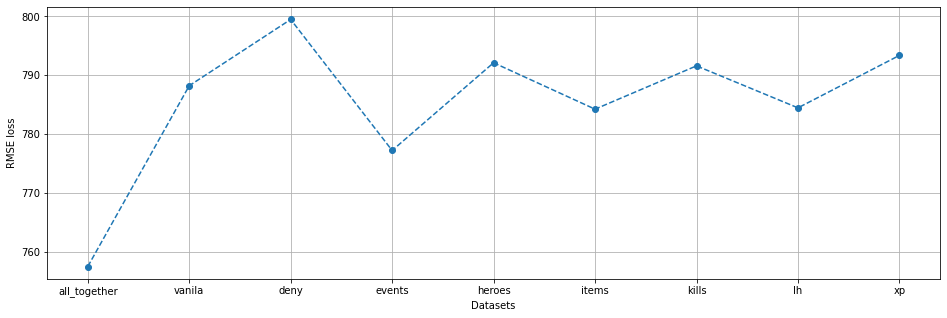

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(16, 5))
plt.plot(scores.keys(), scores.values(), '--o')
plt.ylabel('RMSE loss')
plt.xlabel('Datasets')
plt.grid()
plt.show()

Как мы видим, наиболее важными признаком оказался стобец events, в то время как добавление deny и xp вообще ухудшило качество нашей модели.

###### Собственно, ответики:
1. Да, добавление новых данных заметно улучшило предсказания нашей модели. Причём если обучаться на всех данных, то получается заметно лучшее качество, что можно видеть на графике выше
2. Добавление к исходным данным deny.csv немного ухудшило предсказание -- скорее всего это произошло из-за того, что эта табличка содержит не очень информативные признаки (лично я, никогда не играя в доту, не смог расшифровать, что deny вообще значит)

## Бинарная классификация

**Задание 4** (3 балла)

Реализуйте класс `CustomSGDClassifier`, который бы обучал логистическую регрессию, используя `SGD`.

Класс, должен принимать следующие параметры при инициализации:
    
    learning_rate : float : параметр задающий скорось обучения
    fit_intercept : bool : если True, то добавляем свободный член
    max_iter : int : максимальное число эпох
    shuffle : bool : если True, то перемещиваем данные обучения перед каждой эпохой
    
и иметь методы `fit`, `predict` и `predict_proba`.

После обучения (запуска метода `fit`) мы должны мочь обратиться к атрибутам класса: 
    
    coef_  : ndarray of shape (n_features,)
    intercept_ : ndarray of shape (1,)

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
import numpy as np


class CustomSGDClassifier(BaseEstimator):
    def __init__(self, learning_rate: float, fit_intercept: bool,
                 max_iter: int, shuffle: bool, batch_size: int = 256):
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.loss_history = []

    @staticmethod
    def _sigm(x):
        return 1 / (1 + np.exp(-x))
        
    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
    
        self.batch_size = min(self.batch_size, len(x_train))
        _x_train = np.array(x_train)
        _y_train = np.array(y_train).reshape(-1, 1)

        if self.fit_intercept:
            _x_train = np.hstack((_x_train, np.ones((len(x_train), 1))))

        self.weights = np.random.randn(_x_train.shape[1])
                
        last_ind = 0
        for epoch_num in range(1, self.max_iter + 1):
            if self.shuffle:
                indexes = np.random.randint(low=0, high=len(_x_train), size=self.batch_size)
            else:
                indexes = np.array([ind % len(_x_train) for ind in range(last_ind, last_ind + self.batch_size)])
                last_ind = (last_ind + self.batch_size) % len(_x_train)
        
    
            y_pred = self._sigm(_x_train[indexes] @ self.weights.reshape(-1, 1))
            grad = ((_y_train[indexes] - y_pred) * _x_train[indexes]).sum(axis=0)
            self.weights += self.learning_rate * grad
        
        if self.fit_intercept:
            self.coef_ = self.weights[:-1].flatten()
            self.intercept_ = float(self.weights[-1])
        else:
            self.coef_ = self.weight.flatten()
            self.intercept_ = None
            
        return self

    
    def predict_proba(self, x_test: np.ndarray) -> np.ndarray:
        _x_test = np.array(x_test)
        
        if self.fit_intercept:
            _x_test = np.hstack((_x_test, np.ones((len(x_test), 1))))
        
        predictions = self._sigm(_x_test @ self.weights)
        
        return predictions.flatten()
            
    
    def predict(self, x_test: np.ndarray) -> np.ndarray:

        probas = self.predict_proba(x_test)
        labels = (probas >= 0.5)
        return labels.astype(int)

Используя `CustomSGDClassifier` научитесь прогнозировать победу команды Radiant.

Оптимальный набор гиперпараметров и признаков отберите, опираясь на такие метрики, как `precision`,  `recall` и `ROC-AUC`.
    
Все эксперименты должны быть подкреплены корректными и понятными графиками.

In [ ]:
train_data = pd.read_csv('train.csv')
train = all_data.join(train_data.set_index('mid'), how='inner', lsuffix='_left', rsuffix='_right')#.drop(['mid', 'mid_left', 'mid_right'], axis=1)
train

,player_0_60,player_0_120,player_0_180,player_0_240,player_0_300,player_0_360,player_0_420,player_0_480,player_0_540,player_1_60,...,item_118,item_119,item_120,radiant_killed,dire_killed,radiant_lh,dire_lh,radiant_xp,dire_xp,radiant_won
mid,,,,,,,,,,,,,,,,,,,,,
0,750.0,957.0,1161.0,1571.0,1721.0,1871.0,2022.0,2850.0,3303.0,350.0,...,0.0,0.0,0.0,-1.0,-1.0,126.0,167.0,14245.0,13289.0,1
1,285.0,435.0,585.0,736.0,1334.0,1667.0,1818.0,2016.0,2328.0,344.0,...,0.0,0.0,0.0,-1.0,-1.0,148.0,134.0,13549.0,14906.0,0
2,288.0,756.0,1224.0,1617.0,1920.0,2328.0,2611.0,2879.0,3069.0,288.0,...,0.0,0.0,0.0,-1.0,-1.0,154.0,91.0,15648.0,11467.0,1
4,348.0,572.0,745.0,1170.0,1590.0,1787.0,2070.0,2520.0,2948.0,561.0,...,0.0,0.0,0.0,-1.0,-1.0,134.0,100.0,13507.0,12634.0,1
5,344.0,682.0,1041.0,1692.0,2207.0,2734.0,3125.0,3599.0,4071.0,437.0,...,0.0,0.0,0.0,-1.0,-1.0,94.0,123.0,10416.0,14672.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,287.0,560.0,1086.0,1300.0,1698.0,2043.0,2434.0,3232.0,3504.0,405.0,...,0.0,0.0,0.0,3.0,3.0,149.0,116.0,15439.0,12277.0,0
49940,894.0,1806.0,2201.0,2947.0,3485.0,4515.0,4729.0,5343.0,5840.0,845.0,...,0.0,0.0,0.0,5.0,0.0,152.0,123.0,15941.0,11089.0,1
49941,373.0,556.0,757.0,1050.0,1297.0,1597.0,1783.0,2294.0,2445.0,408.0,...,0.0,0.0,0.0,2.0,4.0,159.0,118.0,13691.0,14906.0,1


In [ ]:
x_train = train[train.columns[:-1]].to_numpy()
x_train

array([[  750.,   957.,  1161., ...,   167., 14245., 13289.],
       [  285.,   435.,   585., ...,   134., 13549., 14906.],
       [  288.,   756.,  1224., ...,    91., 15648., 11467.],
       ...,
       [  373.,   556.,   757., ...,   118., 13691., 14906.],
       [  285.,   436.,   586., ...,   113., 12470., 11471.],
       [  288.,   437.,   585., ...,   167., 11723., 16033.]])

In [ ]:
y_train = train[train.columns[-1]].to_numpy()
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train,test_size = 0.2,random_state = 42) 

In [ ]:
X_train.shape, Y_train.shape

((19979, 453), (19979,))

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
params = dict(learning_rate = [10 ** (-k) * (3 * i) for k in range(2, 7) for i in [1, 2, 3]])
params

{'learning_rate': [0.03,
  0.06,
  0.09,
  0.003,
  0.006,
  0.009000000000000001,
  0.00030000000000000003,
  0.0006000000000000001,
  0.0009000000000000001,
  3.0000000000000004e-05,
  6.000000000000001e-05,
  9e-05,
  3e-06,
  6e-06,
  9e-06]}

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

roc_auc_history = dict()
precision_history = dict()
recall_history = dict()

warnings.filterwarnings("ignore")

for lr in params['learning_rate']:
    cust = CustomSGDClassifier(learning_rate=lr, fit_intercept=True, max_iter=10000, shuffle=True)
    cust.fit(x_train, y_train)
    y_pred = cust.predict(X_test)
    roc_auc_history[lr] = roc_auc_score(Y_test, cust.predict_proba(X_test))
    precision_history[lr] = precision_score(y_true=Y_test, y_pred=y_pred)
    recall_history[lr] = recall_score(y_true=Y_test, y_pred=y_pred)
    
warnings.resetwarnings()

In [ ]:
roc_auc_history

{0.03: 0.642243279508566,
 0.06: 0.6500045144942577,
 0.09: 0.6500964912900786,
 0.003: 0.6432451437858389,
 0.006: 0.6455802297925775,
 0.009000000000000001: 0.6476274967081144,
 0.00030000000000000003: 0.6507376780012069,
 0.0006000000000000001: 0.6500530332581669,
 0.0009000000000000001: 0.6434831588478624,
 3.0000000000000004e-05: 0.6753917970514729,
 6.000000000000001e-05: 0.6663361392816267,
 9e-05: 0.6632082855910839,
 3e-06: 0.688699112331542,
 6e-06: 0.6799777038607442,
 9e-06: 0.6768998951866173}

In [ ]:
precision_history

{0.03: 0.6616954474097331,
 0.06: 0.6715705765407555,
 0.09: 0.6722554890219561,
 0.003: 0.6622047244094488,
 0.006: 0.6634203350214258,
 0.009000000000000001: 0.6695894778796333,
 0.00030000000000000003: 0.6662749706227967,
 0.0006000000000000001: 0.668389662027833,
 0.0009000000000000001: 0.6613218615565115,
 3.0000000000000004e-05: 0.675826363998407,
 6.000000000000001e-05: 0.6759776536312849,
 9e-05: 0.6682206682206682,
 3e-06: 0.6646848989298454,
 6e-06: 0.6590551181102362,
 9e-06: 0.6625791139240507}

In [ ]:
recall_history

{0.03: 0.6454823889739663,
 0.06: 0.6466309341500766,
 0.09: 0.6447166921898928,
 0.003: 0.6439509954058193,
 0.006: 0.6519908116385911,
 0.009000000000000001: 0.6431852986217458,
 0.00030000000000000003: 0.6512251148545176,
 0.0006000000000000001: 0.6435681470137825,
 0.0009000000000000001: 0.6473966309341501,
 3.0000000000000004e-05: 0.6496937212863706,
 6.000000000000001e-05: 0.6485451761102603,
 9e-05: 0.6584992343032159,
 3e-06: 0.6420367534456355,
 6e-06: 0.6408882082695253,
 9e-06: 0.641271056661562}

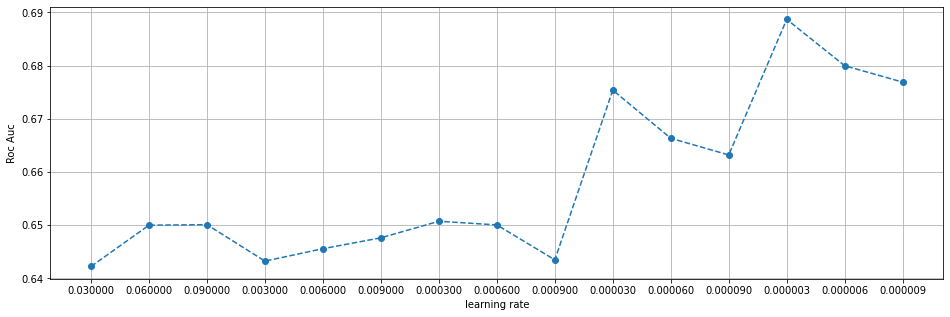

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(16, 5))

VERY_BIG_NUMBER = 1e10

to_plot = dict()
for key, value in roc_auc_history.items():
    if value < VERY_BIG_NUMBER:
        to_plot[f'{key:.6f}'] = value

plt.plot(to_plot.keys(), to_plot.values(), '--o')
plt.ylabel('Roc Auc')
plt.xlabel('learning rate')
plt.grid()
plt.show()

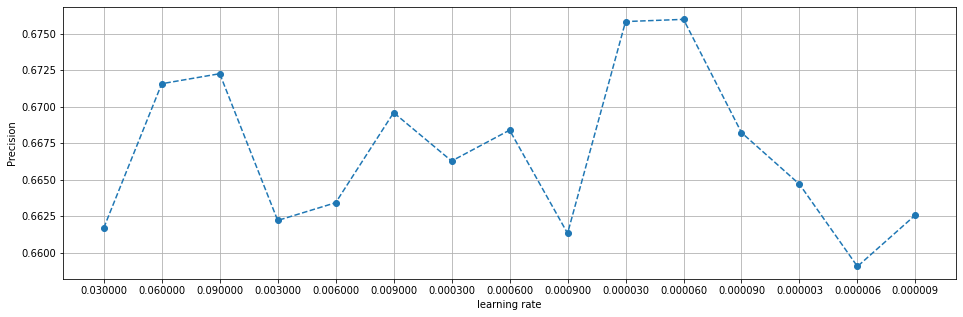

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(16, 5))

VERY_BIG_NUMBER = 1e10

to_plot = dict()
for key, value in precision_history.items():
    if value < VERY_BIG_NUMBER:
        to_plot[f'{key:.6f}'] = value

plt.plot(to_plot.keys(), to_plot.values(), '--o')
plt.ylabel('Precision')
plt.xlabel('learning rate')
plt.grid()
plt.show()

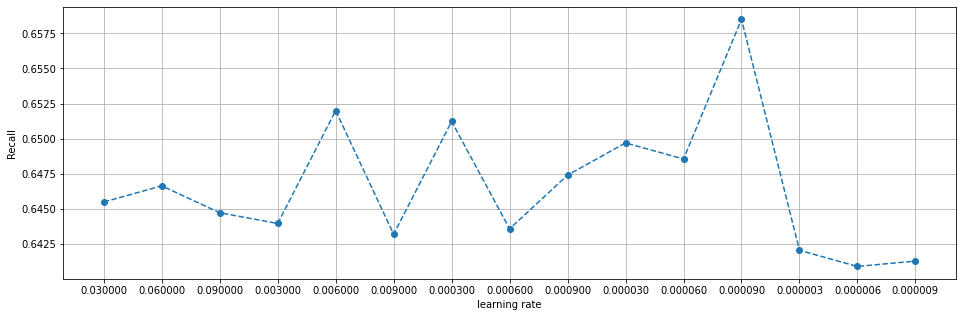

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(16, 5))

VERY_BIG_NUMBER = 1e10

to_plot = dict()
for key, value in recall_history.items():
    if value < VERY_BIG_NUMBER:
        to_plot[f'{key:.6f}'] = value

plt.plot(to_plot.keys(), to_plot.values(), '--o')
plt.ylabel('Recall')
plt.xlabel('learning rate')
plt.grid()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------

Лучшее значение метрики ROC-AUC получаем при learning rate = $3 \cdot 10^{-6}$

Дадим теперь модели сойтись: поставим побольше итераций

In [ ]:
custom_model = CustomSGDClassifier(learning_rate=3e-6, fit_intercept=True, max_iter=500000, shuffle=True)
custom_model.fit(X_train, Y_train)

roc_auc_score(Y_test, custom_model.predict_proba(X_test))

0.7539756467936809

In [ ]:
print(f'precision: {precision_score(y_true=Y_test, y_pred=custom_model.predict(X_test))}, recall: {recall_score(y_true=Y_test, y_pred=custom_model.predict(X_test))}')

precision: 0.6992928917007816, recall: 0.7193721286370597


Обучим теперь, для сравнения, логистическую регрессию из sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(max_iter=10000)

logModel.fit(X_train, Y_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, logModel.predict_proba(X_test)[:, 1])

0.759521727088058

In [ ]:
print(f'precision: {precision_score(y_true=Y_test, y_pred=logModel.predict(X_test))}, recall: {recall_score(y_true=Y_test, y_pred=logModel.predict(X_test))}')

precision: 0.7042569081404033, recall: 0.722052067381317


Как видим, мы получили похожие результаты

**Задание 5** (2 балла)

Попробуйте повысить качество предсказания, используя:

 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
 
Проведите эксперементы по подбору гиперпараметров. Какой алгоритм показал наилучшее качество?

In [ ]:
# Чтобы признаки были не масштабированы
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import time

logModel = LogisticRegression(max_iter=1000, C=1, penalty='l1', solver='saga')

t_start = time.time()
logModel.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, logModel.predict_proba(X_test)[:, 1])

/home/vlad/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7009642381365196

In [ ]:
print(f'For Logistic Regression training time is {t_end - t_start:.2f}s for {logModel.max_iter} epochs')

For Logistic Regression training time is 136.16s for 1000 epochs


In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma='auto', probability=True, max_iter=1000)

t_start = time.time()
svc.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, svc.predict_proba(X_test)[:, 1])

/home/vlad/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.5

In [ ]:
print(f'For Support Vector Machine training time is {t_end - t_start:.2f}s for {svc.max_iter} epochs')

For Support Vector Machine training time is 97.71s for 1000 epochs


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-3, max_iter=1000, learning_rate='invscaling',
                     hidden_layer_sizes=(5, 25, 5), random_state=42)

t_start = time.time()
mlp.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, mlp.predict_proba(X_test)[:, 1])

0.6703771739458736

In [ ]:
print(f'For Multi Layer Perceptron training time is {t_end - t_start:.2f}s for {mlp.max_iter} epochs')

For Multi Layer Perceptron training time is 10.77s for 1000 epochs


###### Видим, что SVM вообще не хочет обучаться. Посмотрим, поможет ли масштабирование признаков

Может ли масштабирование повлиять на работу этих алгоритмов?

In [ ]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
t_start = time.time()
logModel.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, logModel.predict_proba(X_test)[:, 1])

/home/vlad/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.7599659468966948

In [ ]:
print(f'For Logistic Regression training time is {t_end - t_start:.2f}s for {logModel.max_iter} epochs')

For Logistic Regression training time is 129.51s for 1000 epochs


In [ ]:
t_start = time.time()
svc.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, svc.predict_proba(X_test)[:, 1])

/home/vlad/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.5874897741082026

In [ ]:
print(f'For Support Vector Machine training time is {t_end - t_start:.2f}s for {svc.max_iter} epochs')

For Support Vector Machine training time is 97.61s for 1000 epochs


In [ ]:
t_start = time.time()
mlp.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, mlp.predict_proba(X_test)[:, 1])

/home/vlad/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6947818712048527

In [ ]:
print(f'For Multi Layer Perceptron training time is {t_end - t_start:.2f}s for {mlp.max_iter} epochs')

For Multi Layer Perceptron training time is 62.46s for 1000 epochs


###### Мы в очередной раз убедились, что масштабирование решает. Модели, обучаемые на отмасштабированных данных и сходятся быстрее, и показывают лучшие метрики при прочих равных

###### Проведём эксперименты, чтобы подобрать оптимальные гиперпараметры каждой из моделей

In [ ]:
params_log = dict({'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear','saga']})
params_log

{'penalty': ['l1', 'l2'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings("ignore")

kf = KFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(estimator=logModel, param_grid=params_log, scoring='roc_auc', cv=kf)
grid_score = grid_cv.fit(X_train, Y_train)

warnings.resetwarnings()

In [ ]:
grid_score.best_score_

0.7530442445653863

In [ ]:
grid_score.best_params_

{'penalty': 'l1', 'solver': 'saga'}

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
params_svm = dict({'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
params_svm

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
warnings.filterwarnings("ignore")

kf = KFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(estimator=svc, param_grid=params_svm, scoring='roc_auc', cv=kf)
grid_score = grid_cv.fit(X_train, Y_train)

warnings.resetwarnings()

In [ ]:
grid_score.best_score_

0.5871595805897356

In [ ]:
grid_score.best_params_

{'kernel': 'poly'}

-----------------------------------------------------------------------------------------------------------------------------

In [ ]:
params_mlp = dict({'activation': ['tanh', 'relu'],
                   'learning_rate_init': [10 ** (-k) for k in range(2, 6)],
                  'alpha': [10 ** (-k) for k in range(3, 6)]})
params_mlp

{'activation': ['tanh', 'relu'],
 'learning_rate_init': [0.01, 0.001, 0.0001, 1e-05],
 'alpha': [0.001, 0.0001, 1e-05]}

In [ ]:
warnings.filterwarnings("ignore")

kf = KFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(estimator=mlp, param_grid=params_mlp, scoring='roc_auc', cv=kf)
grid_score = grid_cv.fit(X_train, Y_train)

warnings.resetwarnings()

In [ ]:
grid_score.best_score_

0.6874304487932459

In [ ]:
grid_score.best_params_

{'activation': 'relu', 'alpha': 1e-05, 'learning_rate_init': 0.01}

###### Возьмём лучшие модели и дадим им больше итераций на обучение

In [ ]:
best_logModel = LogisticRegression(max_iter=100000, C=1, penalty='l1', solver='saga')

t_start = time.time()
best_logModel.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, best_logModel.predict_proba(X_test)[:, 1])

0.7599204806377999

In [ ]:
print(f'For Logistic Regression training time is {t_end - t_start:.2f}s for {best_logModel.max_iter} epochs')

For Logistic Regression training time is 165.65s for 100000 epochs


In [ ]:
best_svc = SVC(gamma='auto', probability=True, max_iter=100000, kernel='sigmoid')

t_start = time.time()
best_svc.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, best_svc.predict_proba(X_test)[:, 1])

0.7551900618148332

In [ ]:
print(f'For Support Vector Machine training time is {t_end - t_start:.2f}s for {best_svc.max_iter} epochs')

For Support Vector Machine training time is 704.90s for 100000 epochs


In [ ]:
best_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=100000, learning_rate='invscaling',
                     hidden_layer_sizes=(5, 25, 5), random_state=42, activation='relu', learning_rate_init=0.01)

t_start = time.time()
best_mlp.fit(X_train, Y_train)
t_end = time.time()

roc_auc_score(Y_test, best_mlp.predict_proba(X_test)[:, 1])

0.6823172079668454

In [ ]:
print(f'For Multi Layer Perceptron training time is {t_end - t_start:.2f}s for {best_mlp.max_iter} epochs')

For Multi Layer Perceptron training time is 342.87s for 100000 epochs


###### Лучше всего в предсказании себя проявила логистическая регрессия. Сообственно, результат её работы (хотя немножко не этот) и был мной загружен в конкурс на кэггле

------------------------------------------------------------------------------------------------------------------------------

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 6** (2 балла)

Для каждого типа классификатора, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

###### Сохраним в словарь res результаты кросс-валидаций для наших моделей

In [ ]:
res = dict()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True)
cv_score = cross_val_score(best_logModel, X_train, Y_train, cv=kfold, scoring='roc_auc')
res['LogReg'] = cv_score
cv_score

array([0.75173424, 0.75235661, 0.74856295, 0.75652067, 0.75382607])

In [ ]:
cv_score = cross_val_score(best_svc, X_train, Y_train, cv=kfold, scoring='roc_auc')
res['SVC'] = cv_score
cv_score

array([0.75551055, 0.75107996, 0.74694526, 0.75263464, 0.7468319 ])

In [ ]:
cv_score = cross_val_score(best_mlp, X_train, Y_train, cv=kfold, scoring='roc_auc')
res['MLP'] = cv_score
cv_score

/home/vlad/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vlad/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status

array([0.66703068, 0.65832561, 0.67216636, 0.67795635, 0.66045956])

In [ ]:
res

{'LogReg': array([0.75173424, 0.75235661, 0.74856295, 0.75652067, 0.75382607]),
 'SVC': array([0.75551055, 0.75107996, 0.74694526, 0.75263464, 0.7468319 ]),
 'MLP': array([0.66703068, 0.65832561, 0.67216636, 0.67795635, 0.66045956])}

###### Построим теперь по этим данным ящики с усами

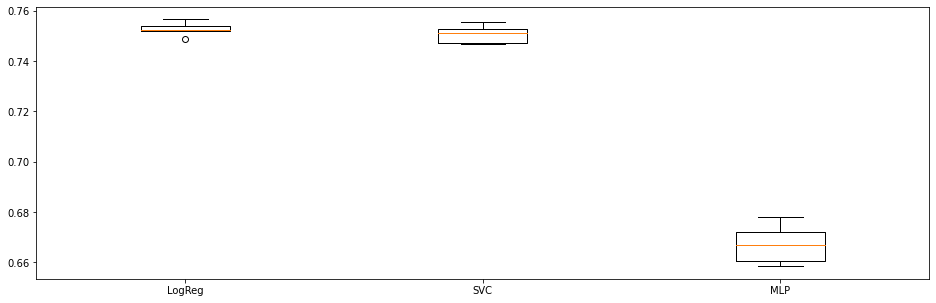

In [ ]:
plt.figure(figsize=(16, 5))
plt.boxplot(res.values(), labels = res.keys())
plt.show()

###### Видим, что модель перцептрона сильно проигрывает двум остальным. Чтобы сравнить LogReg и SVC, построим для них отдельный boxplot

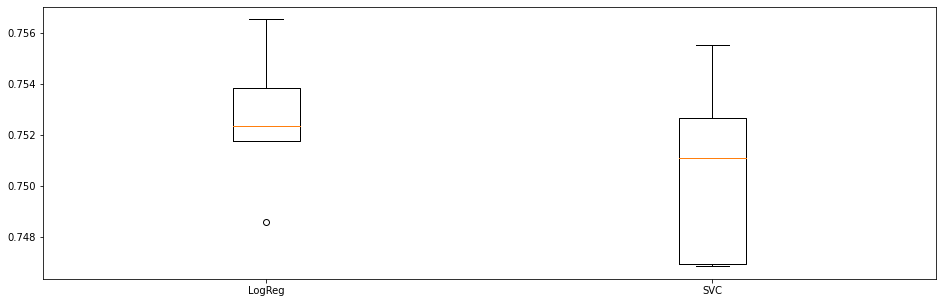

In [ ]:
plt.figure(figsize=(16, 5))
plt.boxplot(list(res.values())[:-1], labels = list(res.keys())[:-1])
plt.show()

###### Собственно, получили, что логистическая регрессия и SVC одинаково хорошо справляются с полученной задачей.

Перцептрон нам обучить не удалось. Возможно, могло бы помочь STACK MORE LAYERS, но заниматься этим не будем)

Гиперпараметры действительно решают -- самый важный это learning rate. В зависимости от него наша модель может как не сойтись в принципе, так и сойтись к какому-то глобальному минимуму.

Также мы поняли, что масштабирование данных очень важно: модели, обучаемые на отмасштабированных данных и сходятся быстрее, и показывают лучшие метрики при прочих равных